In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2017-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.297691
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.267141
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.405802
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.711332
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.965149


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.297691
1,2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.267141
2,2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.405802
3,2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.711332
4,2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.965149


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,29.082500,28.690001,28.950001,29.037500,115127600.0
1,29.127501,28.937500,28.962500,29.004999,84472400.0
2,29.215000,28.952499,28.980000,29.152500,88774400.0
3,29.540001,29.117500,29.195000,29.477501,127007600.0
4,29.857500,29.485001,29.487499,29.747499,134247600.0


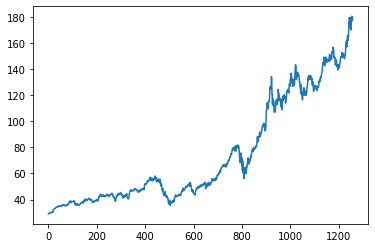

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,29.082500,28.690001,28.950001,29.037500,115127600.0
1,29.127501,28.937500,28.962500,29.004999,84472400.0
2,29.215000,28.952499,28.980000,29.152500,88774400.0
3,29.540001,29.117500,29.195000,29.477501,127007600.0
4,29.857500,29.485001,29.487499,29.747499,134247600.0
...,...,...,...,...,...
1254,180.419998,177.070007,177.089996,180.330002,74919600.0
1255,181.330002,178.529999,180.160004,179.289993,79144300.0
1256,180.630005,178.139999,179.330002,179.380005,62348900.0
1257,180.570007,178.089996,179.470001,178.199997,59773000.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1254    153.3444
1255    153.6667
1256    153.9991
1257    154.3202
1258    154.6399
Name: Close, Length: 1259, dtype: float64

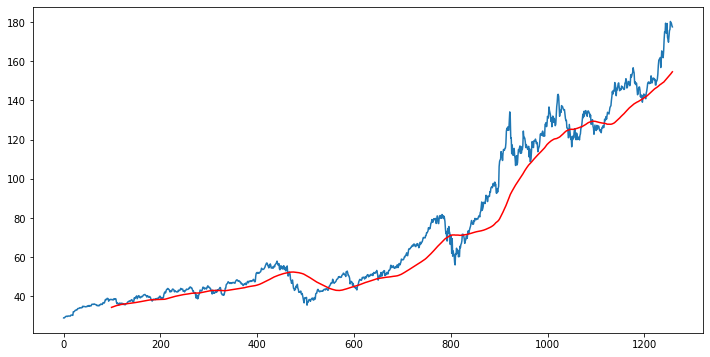

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1254    142.85570
1255    143.13220
1256    143.40125
1257    143.66845
1258    143.95365
Name: Close, Length: 1259, dtype: float64

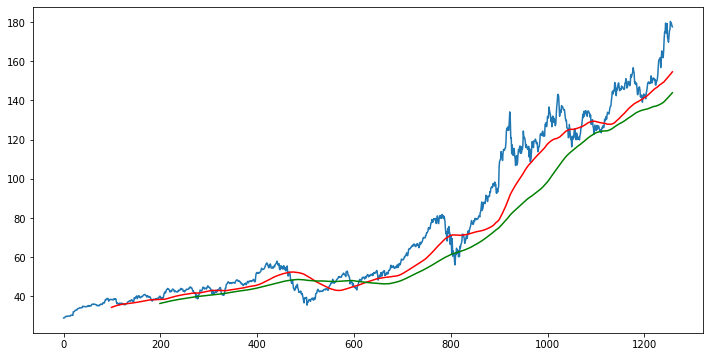

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(1259, 5)

In [13]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(881, 1)
(378, 1)


In [14]:
data_training.head()

,Close
0,29.037500
1,29.004999
2,29.152500
3,29.477501
4,29.747499


In [15]:
data_testing.head()

,Close
881,93.462502
882,93.172501
883,95.342499
884,95.752502
885,95.919998


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[5.18960847e-04]
 [0.00000000e+00]
 [2.35521122e-03]
 [7.54463695e-03]
 [1.18558189e-02]
 [1.23348527e-02]
 [1.48896384e-02]
 [1.28937101e-02]
 [1.20554239e-02]
 [1.58876026e-02]
 [1.58476755e-02]
 [1.50093893e-02]
 [1.58876026e-02]
 [1.62069584e-02]
 [1.57678518e-02]
 [2.33922820e-02]
 [2.36318141e-02]
 [2.36717107e-02]
 [2.23943178e-02]
 [2.12766029e-02]
 [5.08163476e-02]
 [4.99381343e-02]
 [5.21336676e-02]
 [5.69637800e-02]
 [6.19137041e-02]
 [6.39495290e-02]
 [6.54664540e-02]
 [6.42688848e-02]
 [6.89393497e-02]
 [7.58453054e-02]
 [7.78012762e-02]
 [7.71626254e-02]
 [7.86395929e-02]
 [8.25515953e-02]
 [8.41882711e-02]
 [8.18729870e-02]
 [8.23919478e-02]
 [8.34697052e-02]
 [8.37092678e-02]
 [9.48864175e-02]
 [9.15732301e-02]
 [9.48465208e-02]
 [9.30900942e-02]
 [9.38086600e-02]
 [9.17328776e-02]
 [9.04554542e-02]
 [9.22917351e-02]
 [9.25312367e-02]
 [9.16929809e-02]
 [9.75610150e-02]
 [9.84791249e-02]
 [9.56848375e-02]
 [1.01552872e-01]
 [9.50860225e-02]
 [1.01393163e-01]
 [9.939723

In [18]:
data_training_array.shape

(881, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#ML MODEL

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 9s 225ms/step - loss: 0.0639
Epoch 2/50
25/25 [==============================] - 6s 224ms/step - loss: 0.0213
Epoch 3/50
25/25 [==============================] - 6s 223ms/step - loss: 0.0143
Epoch 4/50
25/25 [==============================] - 5s 216ms/step - loss: 0.0098
Epoch 5/50
25/25 [==============================] - 6s 221ms/step - loss: 0.0086
Epoch 6/50
25/25 [==============================] - 6s 241ms/step - loss: 0.0081
Epoch 7/50
25/25 [==============================] - 5s 212ms/step - loss: 0.0075
Epoch 8/50
25/25 [==============================] - 5s 211ms/step - loss: 0.0070
Epoch 9/50
25/25 [==============================] - 5s 217ms/step - loss: 0.0073
Epoch 10/50
25/25 [==============================] - 6s 226ms/step - loss: 0.0079
Epoch 11/50
25/25 [==============================] - 6s 226ms/step - loss: 0.0073
Epoch 12/50
25/25 [==============================] - 6s 243ms/step - loss: 0.0088
Epoch 13/50
25/25 [======

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
881,93.462502
882,93.172501
883,95.342499
884,95.752502
885,95.919998


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\vatsa\AppData\Local\Temp/ipykernel_9764/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [28]:
final_df.head()

,Close
0,79.902496
1,81.800003
2,81.217499
3,81.237503
4,79.750000


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.19164903],
       [0.20692225],
       [0.20223362],
       [0.20239464],
       [0.19042158],
       [0.19971828],
       [0.19303751],
       [0.17844852],
       [0.148526  ],
       [0.12820201],
       [0.13739812],
       [0.0989033 ],
       [0.09858132],
       [0.14979374],
       [0.13069727],
       [0.15770197],
       [0.13794148],
       [0.1301137 ],
       [0.08411312],
       [0.1226884 ],
       [0.10274675],
       [0.04801288],
       [0.10785794],
       [0.03589901],
       [0.05732972],
       [0.04487373],
       [0.04107054],
       [0.0097998 ],
       [0.        ],
       [0.04529633],
       [0.04255963],
       [0.06855822],
       [0.04702688],
       [0.06125365],
       [0.06020726],
       [0.03328304],
       [0.04137237],
       [0.03428918],
       [0.07666768],
       [0.07055035],
       [0.08391188],
       [0.08777542],
       [0.09836   ],
       [0.12612937],
       [0.12085722],
       [0.12540498],
       [0.1175772 ],
       [0.105

In [30]:
input_data.shape

(478, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(data_training_array[i-100: i])
    y_test.append(data_training_array[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [33]:
#Making Predictions

y_predicted = model.predict(x_test)

In [34]:
y_predicted.shape

(378, 1)

In [35]:
y_test

array([0.1500539 , 0.15029341, 0.1466608 , 0.14833737, 0.15739891,
       0.15133127, 0.15340705, 0.15707955, 0.15556269, 0.13157159,
       0.11736059, 0.12203105, 0.11632273, 0.11284977, 0.10478627,
       0.12103309, 0.11572391, 0.11915691, 0.11819891, 0.12079359,
       0.11895737, 0.11061434, 0.11899727, 0.11041474, 0.11177201,
       0.10969623, 0.11205141, 0.10662249, 0.11241067, 0.11592352,
       0.1177997 , 0.11863801, 0.12674148, 0.13181109, 0.13388687,
       0.13596266, 0.13971501, 0.13700052, 0.13672112, 0.14398627,
       0.14658101, 0.14945515, 0.13787873, 0.13364737, 0.13057363,
       0.1358429 , 0.16414515, 0.15787797, 0.16115126, 0.17081155,
       0.17588122, 0.17979322, 0.15688001, 0.16550237, 0.17496311,
       0.18194886, 0.17935412, 0.1670193 , 0.16558222, 0.16442461,
       0.17468365, 0.17548201, 0.17264783, 0.17500301, 0.1814299 ,
       0.18717818, 0.18893461, 0.19152929, 0.1917289 , 0.18386493,
       0.18318633, 0.18059158, 0.17009304, 0.18154965, 0.17899

In [36]:
y_predicted

array([[0.15467097],
       [0.15495202],
       [0.15519384],
       [0.15539269],
       [0.15554887],
       [0.1556832 ],
       [0.1558059 ],
       [0.15592575],
       [0.15605603],
       [0.15620482],
       [0.15633057],
       [0.15637472],
       [0.15629879],
       [0.1560853 ],
       [0.15574037],
       [0.15529531],
       [0.15480244],
       [0.15428032],
       [0.15374881],
       [0.1532278 ],
       [0.15274435],
       [0.15230785],
       [0.15191962],
       [0.15157884],
       [0.15128712],
       [0.1510384 ],
       [0.15082856],
       [0.1506548 ],
       [0.15051046],
       [0.15039058],
       [0.15029189],
       [0.15021226],
       [0.15015006],
       [0.15010686],
       [0.15008664],
       [0.15009327],
       [0.15012999],
       [0.15020001],
       [0.15030198],
       [0.15043268],
       [0.15059231],
       [0.15078528],
       [0.15101485],
       [0.15126948],
       [0.1515249 ],
       [0.15176131],
       [0.15196534],
       [0.152

In [37]:
scaler.scale_

array([0.0080491])

In [38]:
scale_factor = 1/0.0080491
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

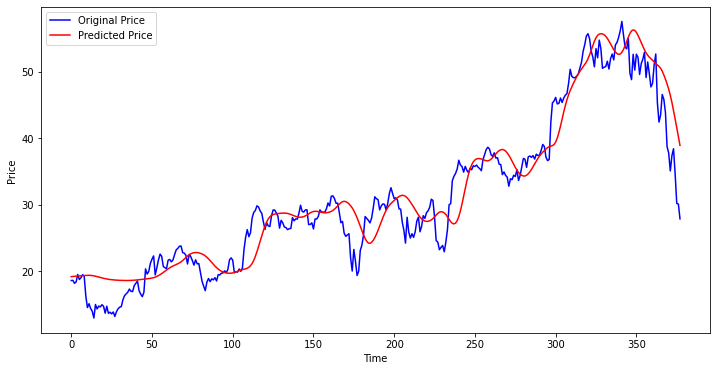

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show